# Task 1: Iris Dataset Classification

Import the necessary libraries

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Load the iris dataset.

In [23]:
iris_data = pd.read_csv('iris.csv')

In [39]:
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Split the data into training and testing sets.

In [25]:
X = iris_data.drop('Species', axis=1)  # Features
X = X.drop('Id', axis=1)  # Features
y = iris_data['Species']  # Target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Perform feature scaling on the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Trai the model.

In [28]:
# Initialize the K-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Making predictions.

In [29]:
# Predict the iris species on the testing data
y_pred = knn.predict(X_test)

Evaluate the model

In [30]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Predict specis of a new iris flower.

In [31]:
new_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction = knn.predict(new_flower)

In [32]:
print(prediction)

['Iris-virginica']


Visualization of classification

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
# Create a classification report
report = classification_report(y_test, y_pred)

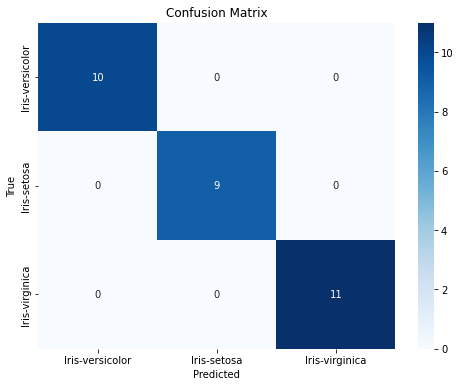

In [36]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Print the classification report
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

